In [3]:
import pandas as pd
import os
from jiwer import wer
from itertools import permutations

os.chdir('/project/graziul/transcripts/ForGMR')

In [4]:
def remove_irrelevant(x):
    x = str(x)
    x = x.replace("\[Uncertain\]","")
    x = x.replace("INAUDIBLE","")    
    x = x.replace("<X>","")
    x = x.replace("-"," ")
    x = ' '.join(x.split())
    x = ''.join([i for i in x if i.isalnum() or i==' '])
    x = x.strip()
    x = x.upper()
    return x

In [2]:
df1 = pd.read_csv('test1.csv')
df2 = pd.read_csv('test2.csv')
df3 = pd.read_csv('test3.csv')
df1.head()

,Unnamed: 0,zone,date,filename,start_voice,end_voice,transcripts_agree,transcription1,transcription2
0,2595,Zone1,2018_08_04,201808042331-339616-27730.mp3,70.952,73.086,True,SEVENTEEN TWENTY FOUR ROBERT,SEVENTEEN TWENTY FOUR ROBERT
1,2596,Zone1,2018_08_04,201808042331-339616-27730.mp3,73.712,75.073,True,TWENTY FOUR ROBERT,TWENTY FOUR ROBERT
2,2598,Zone1,2018_08_04,201808042331-339616-27730.mp3,81.790,82.598,True,TEN FOUR,TEN FOUR
3,2600,Zone1,2018_08_04,201808042331-339616-27730.mp3,93.638,95.388,True,SEVENTEEN THIRTEEN ROBERT,SEVENTEEN THIRTEEN ROBERT
4,2602,Zone1,2018_08_04,201808042331-339616-27730.mp3,118.949,122.450,True,SIXTEEN THIRTY FOUR ROBERT,SIXTEEN THIRTY FOUR ROBERT


In [3]:
df1_GMR = pd.read_excel('297779_test1.xlsx')
df2_GMR = pd.read_excel('297779_test2.xlsx')
df3_GMR = pd.read_excel('297779_test3.xlsx')
df1_GMR.head()

,SID,START,END,TRANSCRIPTION,NOTES
0,Female Speaker,[00.00.023],[00.00.038],SEVENTEEN TWENTY-FOUR ROBERT,NaN
1,Male Speaker,[00.00.075],[00.00.082],TWENTY-FOUR ROBERT,NaN
2,Female Speaker,[00.00.155],[00.00.164],SEVENTEEN THIRTEEN ROBERT,NaN
3,Female Speaker,[00.00.212],[00.00.227],SIXTEEN THIRTY-FOUR ROBERT,NaN
4,Female Speaker,[00.00.267],[00.00.284],SIXTEEN FOURTEEN ROBERT,NaN


In [4]:
df1_GMR.columns.values

array(['SID', 'START', 'END', 'TRANSCRIPTION ', 'NOTES '], dtype=object)

In [6]:
df1['tclean'] = df1['transcription1'].apply(remove_irrelevant)
df2['tclean'] = df2['transcription1'].apply(remove_irrelevant)
df3['tclean'] = df3['transcription1'].apply(remove_irrelevant)
df1_GMR['tclean'] = df1_GMR['TRANSCRIPTION '].apply(remove_irrelevant)
df2_GMR['tclean'] = df2_GMR['TRANSCRIPTION '].apply(remove_irrelevant)
df3_GMR['tclean'] = df3_GMR['TRANSCRIPTION '].apply(remove_irrelevant)

In [7]:
len(df1), len(df1_GMR), len(df1_GMR)/len(df1)

(126, 119, 0.9444444444444444)

In [8]:
len(df2), len(df2_GMR), len(df2_GMR)/len(df2)

(93, 87, 0.9354838709677419)

In [9]:
len(df3), len(df3_GMR), len(df3_GMR)/len(df3)

(85, 74, 0.8705882352941177)

In [10]:
print(wer(df1['tclean'].tolist(), df1_GMR['tclean'].tolist()),
wer(df2['tclean'].tolist(), df2_GMR['tclean'].tolist()),
wer(df3['tclean'].tolist(), df3_GMR['tclean'].tolist()))

0.3339587242026266 0.48088064889918886 0.7813102119460501


In [26]:
df1_not_transcribed_by_GMR = [2,25,37,44,47,48,49,52,53,64,65,71,77,79]
df2_not_transcribed_by_GMR = []
df3_not_transcribed_by_GMR = []

In [22]:
print(df1[['tclean']])

                                                tclean
0                         SEVENTEEN TWENTY FOUR ROBERT
1                                   TWENTY FOUR ROBERT
2                                             TEN FOUR
3                            SEVENTEEN THIRTEEN ROBERT
4                           SIXTEEN THIRTY FOUR ROBERT
5                              SIXTEEN FOURTEEN ROBERT
6                                      FOURTEEN ROBERT
7                                SIXTEEN ELEVEN ROBERT
8                                        ELEVEN ROBERT
9                                FIVE THREE SEVEN FOUR
10                         SIXTEEN THIRTY THREE ROBERT
11                          ONE SIX THREE THREE ROBERT
12                       NOW SEVENTEEN THIRTEEN ROBERT
13       TRAFFIC STOP FIFTY FOUR TWENTY FIVE ON KEDZIE
14                          SIXTEEN TWENTY FOUR ROBERT
15                             ONE SIX TWO FOUR ROBERT
16                             ONE SIX TWO FOUR ROBERT
17        

In [15]:
pd.set_option('display.max_rows',150)

In [29]:
df1.head()

,Unnamed: 0,zone,date,filename,start_voice,end_voice,transcripts_agree,transcription1,transcription2,tclean
0,2595,Zone1,2018_08_04,201808042331-339616-27730.mp3,70.952,73.086,True,SEVENTEEN TWENTY FOUR ROBERT,SEVENTEEN TWENTY FOUR ROBERT,SEVENTEEN TWENTY FOUR ROBERT
1,2596,Zone1,2018_08_04,201808042331-339616-27730.mp3,73.712,75.073,True,TWENTY FOUR ROBERT,TWENTY FOUR ROBERT,TWENTY FOUR ROBERT
2,2598,Zone1,2018_08_04,201808042331-339616-27730.mp3,81.790,82.598,True,TEN FOUR,TEN FOUR,TEN FOUR
3,2600,Zone1,2018_08_04,201808042331-339616-27730.mp3,93.638,95.388,True,SEVENTEEN THIRTEEN ROBERT,SEVENTEEN THIRTEEN ROBERT,SEVENTEEN THIRTEEN ROBERT
4,2602,Zone1,2018_08_04,201808042331-339616-27730.mp3,118.949,122.450,True,SIXTEEN THIRTY FOUR ROBERT,SIXTEEN THIRTY FOUR ROBERT,SIXTEEN THIRTY FOUR ROBERT


In [34]:
df1['tclean2'] = df1['transcription2'].apply(remove_irrelevant)
print(wer(df1['tclean'].tolist(), df1['tclean2'].tolist()))
df1['tclean'].tolist(), df1['tclean2'].tolist()

0.0


(['SEVENTEEN TWENTY FOUR ROBERT',
  'TWENTY FOUR ROBERT',
  'TEN FOUR',
  'SEVENTEEN THIRTEEN ROBERT',
  'SIXTEEN THIRTY FOUR ROBERT',
  'SIXTEEN FOURTEEN ROBERT',
  'FOURTEEN ROBERT',
  'SIXTEEN ELEVEN ROBERT',
  'ELEVEN ROBERT',
  'FIVE THREE SEVEN FOUR',
  'SIXTEEN THIRTY THREE ROBERT',
  'ONE SIX THREE THREE ROBERT',
  'NOW SEVENTEEN THIRTEEN ROBERT',
  'TRAFFIC STOP FIFTY FOUR TWENTY FIVE ON KEDZIE',
  'SIXTEEN TWENTY FOUR ROBERT',
  'ONE SIX TWO FOUR ROBERT',
  'ONE SIX TWO FOUR ROBERT',
  'TEN FOUR',
  'SEVEN TWENTY THREE ROBERT',
  'SEVENTEEN NINETY FIVE ROBERT',
  'ONE SEVEN NINE FIVE ROBERT',
  'SEVENTEEN NINETY FIVE',
  'SIXTEEN THIRTY THREE ROBERT',
  'VERY GOOD THANK YOU',
  'TWENTY ONE ROBERT',
  'SIXTEEN THIRTY TWO ROBERT',
  'TEN FOUR',
  'SIXTEEN TWENTY TWO ROBERT',
  'SEVENTEEN EIGHTY EIGHT ROBERT',
  'THIRTY FOUR ROBERT',
  'FLASHING RED',
  'ALL DIRECTIONS OR',
  'SEVENTEEN TWELVE ROBERT',
  'SEVENTEEN TWELVE ROBERT',
  'ONE SIX THREE THREE ROBERT FOR THE MOBILE WIT

In [27]:
print(wer(df1['tclean'].tolist(), df1_GMR['tclean'].tolist()),
wer(df1.loc[~df1.index.isin(df1_not_transcribed_by_GMR),'tclean'].tolist(), df1_GMR['tclean'].tolist()))

0.3339587242026266 0.2903885480572597


In [23]:
print(df1_GMR[['tclean']])

                                                tclean
0                         SEVENTEEN TWENTY FOUR ROBERT
1                                   TWENTY FOUR ROBERT
2                            SEVENTEEN THIRTEEN ROBERT
3                           SIXTEEN THIRTY FOUR ROBERT
4                              SIXTEEN FOURTEEN ROBERT
5                                      FOURTEEN ROBERT
6                                FIFTEEN ELEVEN ROBERT
7                                        ELEVEN ROBERT
8                                FIVE THREE SEVEN FOUR
9                          SIXTEEN THIRTY THREE ROBERT
10                          ONE SIX THREE THREE ROBERT
11                       NOW SEVENTEEN THIRTEEN ROBERT
12        TRAFFIC STOP FIFTY FOUR TWENTY FIVE ON CUDBY
13                          SIXTEEN TWENTY FOUR ROBERT
14                             ONE SIX TWO FOUR ROBERT
15                             ONE SIX TWO FOUR ROBERT
16                                            TEN FOUR
17        

In [66]:
df_transcripts.loc[df_transcripts['transcriber']=='kjc','tclean'].tolist()

['TEEN THIRTY TWO',
 'SIXTEEN THIRTY TWO',
 'UH ONE EIGHT FIVE COHERENT DIRECTION IRVING PARK AND CENTRAL',
 'TEN FOUR',
 '',
 'TEN FOUR',
 'SEVENTEEN THIRTY TWO',
 'THREE TWO',
 'SEVEN THIRTY OUT FOR THE ASSIST',
 'THIRTY',
 'CALIFORNIA AND IRVING PARK COUNTLESS PEOPLE HANGING OUT IN A BUS FILTER',
 'THIRTY TWO CAUGHT UP EVERYTHING OVER THERE',
 'WERE TEN FOUR',
 'SEVEN THIRTY WAITING FOR THE',
 'YEAH',
 'SEVENTEEN ELEVEN DROPPING A IN YOUR BOX FIFTY THREE TWENTY FOUR NORTH HAMLIN',
 'OKAY',
 'SEVENTEEN THIRTEEN ANY LUCK WITH THAT TRANSPORT',
 'UH NEGATIVE WE STILL DONT HAVE THE UM TWO',
 'OKAY UH MYSELF AND THIRTY THREE WILL JUST JUMP IN ONE CAR AND AND TAKE EM',
 'TEN FOUR',
 '',
 'FENDER COME IN',
 'ONE SIX TWO FOUR',
 'ONE SIX THREE FOUR',
 'TWO FOUR ONE SIX TWO FOUR EVENT NUMBER FOR SPECIAL ATTENTION UH THE PORTAGE PARK APARTMENT',
 'IM TEN FOUR',
 'SEVENTEEN ELEVEN',
 'ELEVEN',
 'GOT A BURGLAR ALARM FORTY ONE SIXTY NINE WEST GLENLEE ITS THE BACK DOOR',
 'ELEVEN NINETY NINE ILL G

In [67]:
wer_list = []
for f in filenames:
    df_temp = df_transcripts[df_transcripts['filename']==f]
    transcribers = df_temp['transcriber'].unique()
    if len(transcribers)>1:
        for t in set(permutations(transcribers,2)):
            zone = df_temp['zone'].unique()[0]
            month = df_temp['month'].unique()[0]
            day = df_temp['day'].unique()[0]
            time = df_temp['time'].unique()[0]
            df_temp['text'] = df_temp['transcription'].apply(remove_irrelevant)
            t1 = df_temp[df_temp['transcriber']==t[0]]
            t2 = df_temp[df_temp['transcriber']==t[1]]
            wer_list.append([t[0],t[1], wer('#'.join(t1['text'].tolist()), '#'.join(t2['text'].tolist())), zone, month, day, time, f])

/home/graziul/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [68]:
df_wer = pd.DataFrame(wer_list, columns = ['ref','hyp','wer','zone','month','day','time','filename'])
df_wer.to_csv('intertranscriber_wer.csv',index=False)
df_wer.describe()

,wer,month,day,time
count,298.000000,298.0,298.000000,298.000000
mean,0.465857,8.0,8.355705,794.214765
std,0.209999,0.0,3.385598,834.405279
min,0.135135,8.0,4.000000,1.000000
25%,0.332807,8.0,5.000000,121.000000
50%,0.401080,8.0,10.000000,426.000000
75%,0.514707,8.0,12.000000,1638.000000
max,1.382576,8.0,13.000000,2351.000000


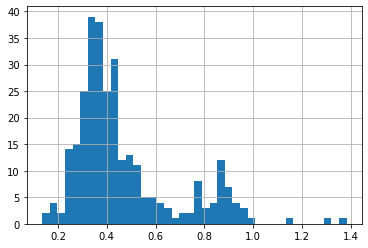

In [69]:
df_wer['wer'].hist(bins=40)

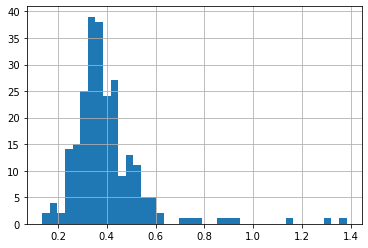

In [70]:
no_aek = (df_wer['ref']!='aek') & (df_wer['hyp']!='aek')
df_wer.loc[no_aek,'wer'].hist(bins=40)

In [71]:
df_wer.loc[no_aek].describe()

,wer,month,day,time
count,244.000000,244.0,244.000000,244.000000
mean,0.398346,8.0,9.131148,864.754098
std,0.151231,0.0,3.263341,827.995689
min,0.135135,8.0,4.000000,1.000000
25%,0.321766,8.0,5.000000,130.000000
50%,0.368993,8.0,11.000000,529.000000
75%,0.435192,8.0,12.000000,1708.000000
max,1.382576,8.0,13.000000,2351.000000


ref
aek    AxesSubplot(0.125,0.125;0.775x0.755)
ah     AxesSubplot(0.125,0.125;0.775x0.755)
ahs    AxesSubplot(0.125,0.125;0.775x0.755)
his    AxesSubplot(0.125,0.125;0.775x0.755)
jar    AxesSubplot(0.125,0.125;0.775x0.755)
kjc    AxesSubplot(0.125,0.125;0.775x0.755)
kk     AxesSubplot(0.125,0.125;0.775x0.755)
kw     AxesSubplot(0.125,0.125;0.775x0.755)
mcm    AxesSubplot(0.125,0.125;0.775x0.755)
mgw    AxesSubplot(0.125,0.125;0.775x0.755)
mh     AxesSubplot(0.125,0.125;0.775x0.755)
oaa    AxesSubplot(0.125,0.125;0.775x0.755)
rc     AxesSubplot(0.125,0.125;0.775x0.755)
sj     AxesSubplot(0.125,0.125;0.775x0.755)
tjs    AxesSubplot(0.125,0.125;0.775x0.755)
wam    AxesSubplot(0.125,0.125;0.775x0.755)
wpd    AxesSubplot(0.125,0.125;0.775x0.755)
Name: wer, dtype: object

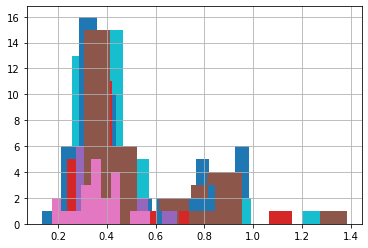

In [61]:
df_wer.groupby('ref')['wer'].hist()

In [120]:
df_temp['transcriber'].unique()

array(['mh', 'mgw', 'kjc', 'wam', 'aek'], dtype=object)

In [135]:
df_temp

,feed,zone,year,month,day,time,sid,start,end,transcription,notes,file,transcriber,start_c,start_dt,end_c,end_dt,length,length_s,filename
17,27730,Zone1,2018,8,12,304,1624,00.00.32.882,00.00.34.011,SIXTEEN TWENTY FOUR ROBERT,NaN,201808120304-366043-27730ah.xlsx,ah,00.00.32.882,1900-01-01 00:00:32.882000,00.00.34.011,1900-01-01 00:00:34.011000,0 days 00:00:01.129000000,1.129,201808120304-366043-27730
18,27730,Zone1,2018,8,12,304,1,00.00.35.998,00.00.37.461,TWO FOUR ROBERT,NaN,201808120304-366043-27730ah.xlsx,ah,00.00.35.998,1900-01-01 00:00:35.998000,00.00.37.461,1900-01-01 00:00:37.461000,0 days 00:00:01.463000000,1.463,201808120304-366043-27730
19,27730,Zone1,2018,8,12,304,1624,00.00.37.846,00.00.41.092,UH WE FOUND THE UH TAXI DRIVER IT'S GOING TO B...,NaN,201808120304-366043-27730ah.xlsx,ah,00.00.37.846,1900-01-01 00:00:37.846000,00.00.41.092,1900-01-01 00:00:41.092000,0 days 00:00:03.246000000,3.246,201808120304-366043-27730
20,27730,Zone1,2018,8,12,304,1,00.01.01.596,00.01.03.861,SIXTEEN TWENTY ONE ROBERT,NaN,201808120304-366043-27730ah.xlsx,ah,00.01.01.596,1900-01-01 00:01:01.596000,00.01.03.861,1900-01-01 00:01:03.861000,0 days 00:00:02.265000000,2.265,201808120304-366043-27730
21,27730,Zone1,2018,8,12,304,1621,00.01.05.537,00.01.06.584,SIX TWO ONE ROBERT,NaN,201808120304-366043-27730ah.xlsx,ah,00.01.05.537,1900-01-01 00:01:05.537000,00.01.06.584,1900-01-01 00:01:06.584000,0 days 00:00:01.047000000,1.047,201808120304-366043-27730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20591,27730,Zone1,2018,8,12,304,SID-0001,00.25.55.992,00.26.0.091,CALLER'S RAMBLING ON ABOUT A WOMAN AND A MAN ...,NaN,201808120304-366043-27730MCM.txt,mcm,00.25.55.992,1900-01-01 00:25:55.992000,00.26.0.091,1900-01-01 00:26:00.091000,0 days 00:00:04.099000000,4.099,201808120304-366043-27730
20592,27730,Zone1,2018,8,12,304,SID-0001,00.26.0.497,00.26.1.995,BUT HE WANTS THE POLICE RIGHT NOW,NaN,201808120304-366043-27730MCM.txt,mcm,00.26.0.497,1900-01-01 00:26:00.497000,00.26.1.995,1900-01-01 00:26:01.995000,0 days 00:00:01.498000000,1.498,201808120304-366043-27730
20593,27730,Zone1,2018,8,12,304,SID-5324,00.29.35.34,00.29.36.408,FIFTY THREE TWENTY FOUR ROBERT,NaN,201808120304-366043-27730MCM.txt,mcm,00.29.35.34,1900-01-01 00:29:35.340000,00.29.36.408,1900-01-01 00:29:36.408000,0 days 00:00:01.068000000,1.068,201808120304-366043-27730
20594,27730,Zone1,2018,8,12,304,SID-0001,00.29.38.544,00.29.39.438,TWENTY FOUR ROBERT,NaN,201808120304-366043-27730MCM.txt,mcm,00.29.38.544,1900-01-01 00:29:38.544000,00.29.39.438,1900-01-01 00:29:39.438000,0 days 00:00:00.894000000,0.894,201808120304-366043-27730


In [129]:
for s in set(permutations(df_temp['transcriber'].unique(),2)):
    print(s[0],s[1])

kjc mh
aek mgw
wam aek
mh wam
mgw kjc
kjc aek
mgw wam
wam mgw
kjc mgw
mgw mh
aek wam
mgw aek
mh mgw
wam kjc
mh kjc
mh aek
aek mh
aek kjc
kjc wam
wam mh


## Assessing test File #4 and File #5
### File #4: Random sample from files with %WER between 25th and 50th percentile
### File #5: Random sample from files with %WER between 50th and 75th percentile

In [5]:
df4 = pd.read_csv('test4.csv')
df5 = pd.read_csv('test5.csv')
df4.head()

,Unnamed: 0,zone,date,filename,start_voice,end_voice,transcripts_agree,transcriber1,transcription1,transcriber2,transcription2
0,0,Zone1,2018_08_04,201808042331-339616-27730.mp3,75.597,81.386,False,mgw,RESIDENTIAL ALARM FOURTY THIRTY ONE PATTERSON ...,kjc,RESIDENTIAL ALARM FORTY THIRTY ONE PATTERSON T...
1,1,Zone1,2018_08_04,201808042331-339616-27730.mp3,96.398,100.190,False,mgw,I NEED A RESULT FOR A BOOKING ON ARAGON ALBANY,kjc,CAN YOU PUT US DOWN FOR A UNCERTAIN ON UNCERTA...
2,2,Zone1,2018_08_04,201808042331-339616-27730.mp3,331.941,334.836,False,mgw,TRAFFIC STOP SIXTY ONE FOURTY FIVE NORTH WEST ...,kjc,TRAFFIC STOP AT TWO ONE FORTY FIVE STREET NAME...
3,3,Zone1,2018_08_04,201808042331-339616-27730.mp3,348.097,355.562,False,mgw,THEY SENT A FORCE TO INVOLVE CONCERN CITIZEN W...,kjc,THEY SAID A FOUR TWENTY FOUR OR FIVE CONCERNED...
4,4,Zone1,2018_08_04,201808042331-339616-27730.mp3,368.023,370.985,False,mgw,MO WITH DAL WITH SIXTEEN THIRTY THREE ROBERT S...,kjc,WELL LINK UP WITH SIXTEEN THIRTY THREE ROBERT ...


In [7]:
df4_GMR = pd.read_excel('297779_test4.xlsx')
df5_GMR = pd.read_excel('297779_test5.xlsx')
df4_GMR.head()

,SID,START,END,TRANSCRIPTION,NOTES
0,FEMALE SPEAKER,[00.00.033],[00.00.082],RESIDENTIAL ALARM FORTY THIRTY-ONE SANDERSON T...,NaN
1,FEMALE SPEAKER,[00.00.120],[00.00.156],I THINK THEY WERE GOING THROUGH A <X> I WAS TR...,0.4 seconds
2,MALE SPEAKER,[00.00.182],[00.00.215],TRAFFIC STOPPED SIXTY-ONE FORTY-FIVE NORTHWEST...,NaN
3,MALE SPEAKER,[00.00.249],[00.00.318],JUST HAD A FOURTEEN CALL CONCERNED CITIZENS [W...,low confidence due to muffled voice
4,MALE SPEAKER,[00.00.347],[00.00.376],[NORWARD DAHL] WITH SIXTEEN THIRTY-THREE ROBER...,NaN


In [16]:
df4['tclean'] = df4['transcription1'].apply(remove_irrelevant)
df5['tclean'] = df5['transcription1'].apply(remove_irrelevant)
df4_GMR['tclean'] = df4_GMR['TRANSCRIPTION '].apply(remove_irrelevant)
df5_GMR['tclean'] = df5_GMR['TRANSCRIPTION '].apply(remove_irrelevant)

In [17]:
len(df4), len(df4_GMR), len(df4_GMR)/len(df4)

(87, 87, 1.0)

In [18]:
len(df5), len(df5_GMR), len(df5_GMR)/len(df5)

(88, 88, 1.0)

In [19]:
print(wer(df4['tclean'].tolist(), df4_GMR['tclean'].tolist()),
wer(df5['tclean'].tolist(), df5_GMR['tclean'].tolist()))

0.3081130355515041 0.35759209344115006
